In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import re

#### Import the data and get a high-level picture

In [53]:
df = pd.read_csv('sales.csv')
df.head()

,order_id,name,ordered_at,price,quantity,line_total
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,$3.50,3,$10.50
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,$3.50,1,$3.50
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,$2.50,2,$5.00
3,10001,NaN,2018-01-01 12:14:54,$1.50,1,$1.50
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:54,$3.50,1,$3.50


In [54]:
df.shape

(29922, 6)

In [55]:
df.dtypes

order_id       int64
name          object
ordered_at    object
price         object
quantity       int64
line_total    object
dtype: object

#### TODO: Fix column datatypes

1. Change ordered_at to datetime

2. Change price and line_total to float

In [56]:
# TODO: Change ordered_at to datetime
df['ordered_at'] = pd.to_datetime(df['ordered_at'])
print(df.dtypes)

order_id               int64
name                  object
ordered_at    datetime64[ns]
price                 object
quantity               int64
line_total            object
dtype: object


In [57]:
df.head(3)

,order_id,name,ordered_at,price,quantity,line_total
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,$3.50,3,$10.50
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,$3.50,1,$3.50
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,$2.50,2,$5.00


In [58]:
# TODO: Change price and line_total to float
df['price'] = df['price'].str.replace('$', '').astype(float)
df['line_total'] = df['line_total'].str.replace('$', '').astype(float)
print(df.dtypes)

order_id               int64
name                  object
ordered_at    datetime64[ns]
price                float64
quantity               int64
line_total           float64
dtype: object


In [59]:
df.head(3)

,order_id,name,ordered_at,price,quantity,line_total
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,3,10.5
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,1,3.5
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,2.5,2,5.0


In [60]:
df.dtypes

order_id               int64
name                  object
ordered_at    datetime64[ns]
price                float64
quantity               int64
line_total           float64
dtype: object

#### TODO: drop if duplicated or null

In [61]:
df = df.dropna()
df.shape

(28434, 6)

In [62]:
# TODO: use drop_duplicates() here
df = df.drop_duplicates()
df.shape

(27903, 6)

In [63]:
df.isnull().sum()

order_id      0
name          0
ordered_at    0
price         0
quantity      0
line_total    0
dtype: int64

In [64]:
df[df['name'].isnull()].head()

,order_id,name,ordered_at,price,quantity,line_total


#### Sanity check for value ranges and to check assumptions

In [65]:
df[(df['price'] * df['quantity']) != df['line_total']].shape[0]

28

In [66]:
df[df['line_total'] < 0].shape[0]

279

#### TODO: 
1. Get rows with **line_total = price * quantity**

2. Then remove if line total < 0

In [67]:
# TODO: Set line_total = price * quantity.
print(df[(df['price'] * df['quantity']) != df['line_total']].shape[0])
# remove the rows where line_total is not equal to price * quantity
df = df[df['line_total'] == df['price'] * df['quantity']]
print(df[(df['price'] * df['quantity']) != df['line_total']].shape[0])

28
0


In [68]:
# TODO: Then remove if line total < 0
print(df[df['line_total'] < 0].shape[0])
df = df[df['line_total'] >= 0]
print(df[df['line_total'] < 0].shape[0])

279
0


In [69]:
df.describe()

,order_id,ordered_at,price,quantity,line_total
count,27596.000000,27596,27596.000000,27596.000000,27596.000000
mean,14993.365995,2018-04-15 11:28:18.634331136,2.511596,2.000833,5.028845
min,10000.000000,2018-01-01 11:30:00,0.500000,1.000000,0.500000
25%,12499.000000,2018-02-23 03:10:24,1.500000,1.000000,2.500000
50%,14972.500000,2018-04-14 15:00:30.500000,2.500000,2.000000,4.500000
75%,17506.250000,2018-06-07 00:18:55,3.500000,3.000000,7.500000
max,19999.000000,2018-07-28 18:51:57,4.000000,3.000000,12.000000
std,2888.622150,NaN,1.059402,0.819472,3.085841


#### TODO: Get value between "" in name and put it in category column by using .apply
E.g: "ICE CREAM" Peanut Fudge, here we want to extract the phrase "ICE CREAM", and put it in newly created column called **category**

In [70]:
df.head(10)

,order_id,name,ordered_at,price,quantity,line_total
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,3,10.5
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,1,3.5
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,2.5,2,5.0
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:54,3.5,1,3.5
5,10002,"""SORBET"" Lychee",2018-01-01 12:23:09,3.0,1,3.0
7,10002,"""ICE CREAM"" Earl Gray",2018-01-01 12:23:09,0.5,3,1.5
8,10003,"""ICE CREAM"" Matcha",2018-01-01 12:49:35,1.5,3,4.5
9,10004,"""BEVERAGE"" Iced Coffee",2018-01-01 13:22:59,2.5,2,5.0
10,10004,"""BEVERAGE"" Espresso",2018-01-01 13:22:59,2.5,1,2.5
11,10004,"""ICE CREAM"" Mint Chip",2018-01-01 13:22:59,1.5,2,3.0


In [71]:
# TODO
pattern = r"^'([A-Z ]+)' (.*)" 
# regular expression. ^ match at the start. ([A-Z ]+) match any capital letter and space. (.*) match any character
transform_func = lambda x: re.findall(pattern, x)[0][0] if re.findall(pattern, x) else "" # this function will return the first match of the pattern

example_string = "'ICE CREAM' Peanut Fudge"
print(transform_func(example_string))

df['category'] = df['name'].apply(transform_func)

df.head(3)

ICE CREAM


,order_id,name,ordered_at,price,quantity,line_total,category
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,3,10.5,
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,1,3.5,
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,2.5,2,5.0,


In [72]:
import re

pattern = r"^'([A-Z ]+)' (.*)"

# Example string
text = "'ICE CREAM' Peanut Fudge"

# Applying the function directly to a string
transform_func = lambda x: re.findall(pattern, x)[0][0] 

result = transform_func(text)
print(result)  # Output: ('HELLO WORLD', 'This is a test sentence.')


ICE CREAM


In [73]:
df.head()

,order_id,name,ordered_at,price,quantity,line_total,category
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,3,10.5,
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,1,3.5,
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,2.5,2,5.0,
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:54,3.5,1,3.5,
5,10002,"""SORBET"" Lychee",2018-01-01 12:23:09,3.0,1,3.0,


#### Analysis, finally!

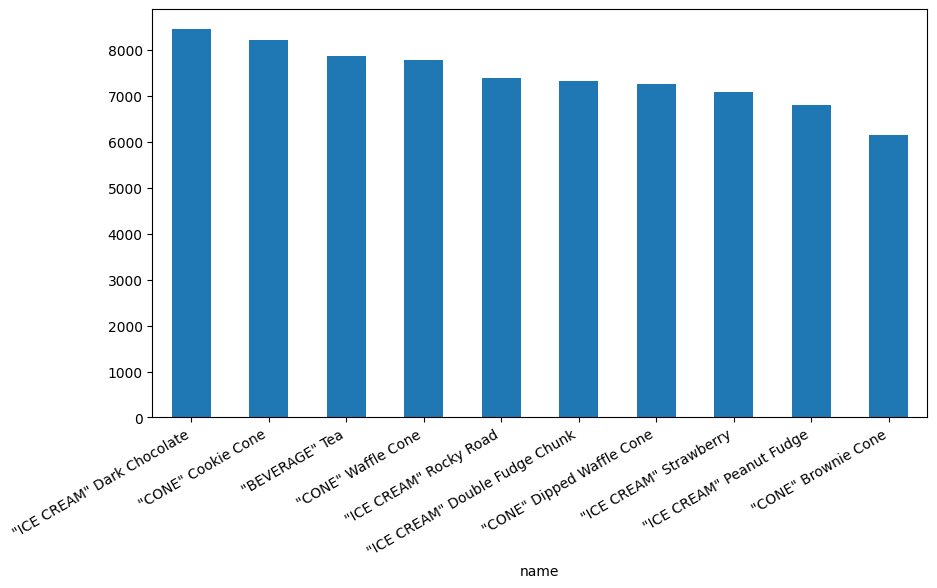

In [75]:
f, ax = plt.subplots(figsize=(10, 6))
df.groupby('name')['line_total'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
f.autofmt_xdate()
plt.show()